<a href="https://colab.research.google.com/github/gowtham-ravii/cvdwebapp-py-main/blob/master/heart_disease_risk_in_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

In [ ]:
heart = pd.read_csv('/content/sample_data/data.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
heart.shape
#270 observations and 14 columns/variables in the dataset.

(270, 14)

In [ ]:
heart.info()
#there are 270 observations in the datsets: with nearly all variables in numeric format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
#checking missing values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#distribution of outcome variable 'target': '1' means No and '2' means Yes for heart disease.
heart['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

In [ ]:
#% of patients who have heart disease
heart['target'].value_counts()/heart.shape[0]*100

1    55.555556
2    44.444444
Name: target, dtype: float64

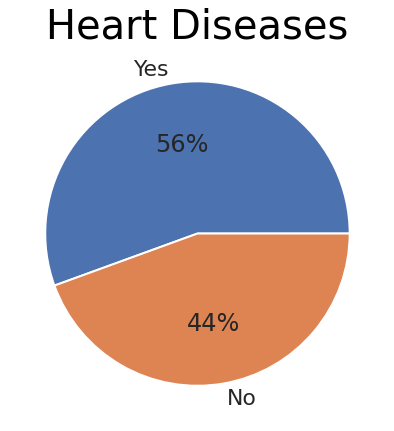

In [ ]:
#Pie-chart for visualization of heart disease (1: No, 2: Yes)
labels=['Yes','No']
values=heart['target'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(7,7))
plt.title('Heart Diseases', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

**Correlation between variables**

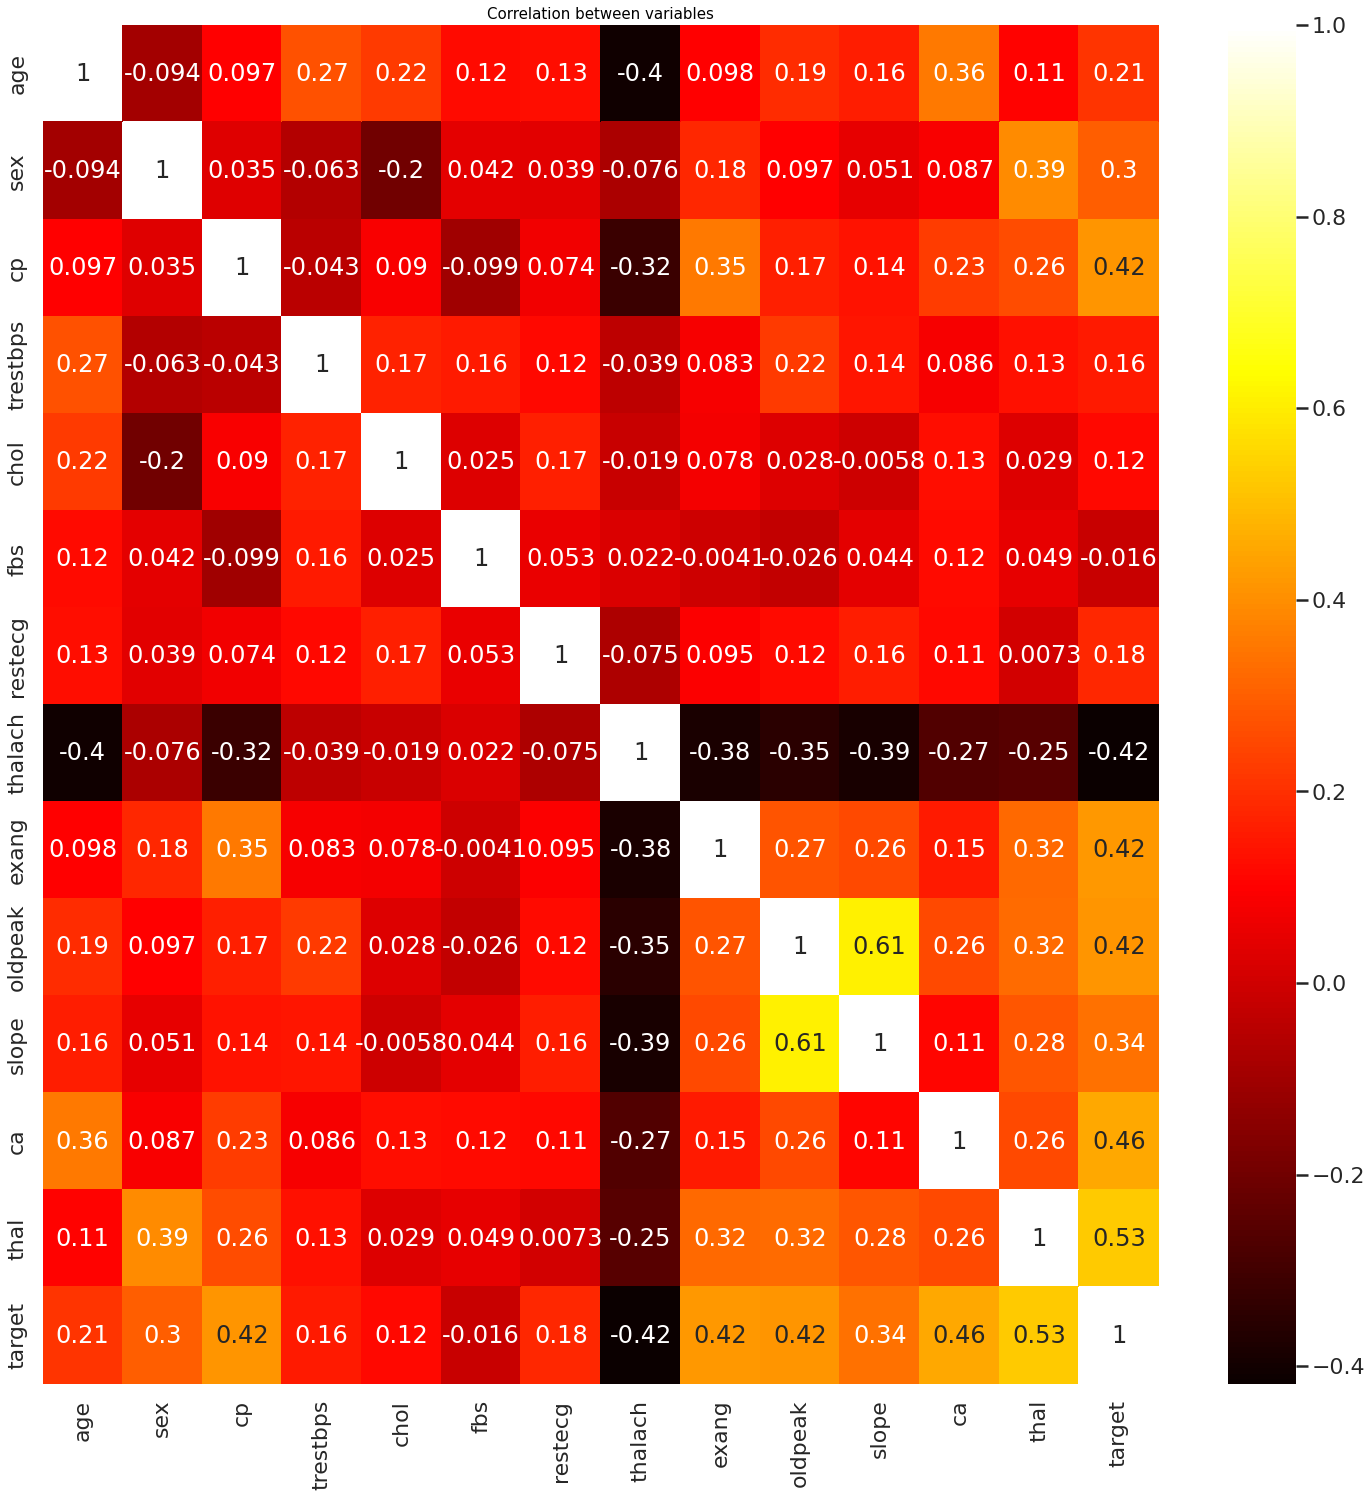

In [ ]:
#Correlation between variables
sns.set_theme(context='poster')
plt.figure(figsize=(25,25))
plt.title('Correlation between variables', color="Black",fontsize=15)
sns.heatmap(heart.corr(),annot=True,cmap="hot")
plt.show()

**Age**

In [ ]:
# Min, max and average of the age variable
print('Min age: ', min(heart['age']))
print('Max age: ', max(heart['age']))
print('Average age: ', heart['age'].mean())

Min age:  29
Max age:  77
Average age:  54.43333333333333


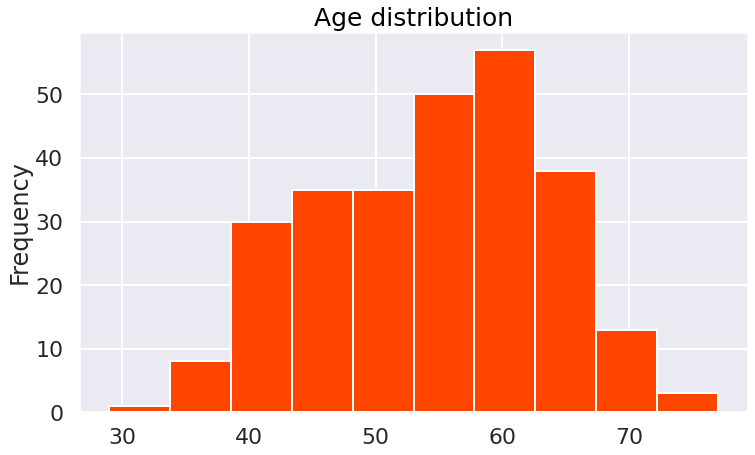

In [ ]:
sns.set_theme(context='poster')
plt.figure(figsize=(12,7))
plt.title('Age distribution', color="Black",fontsize=25)
heart['age'].plot(kind = 'hist',color='orangered')
plt.show()

In [ ]:
#Age distribution for those with and without heart disease

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



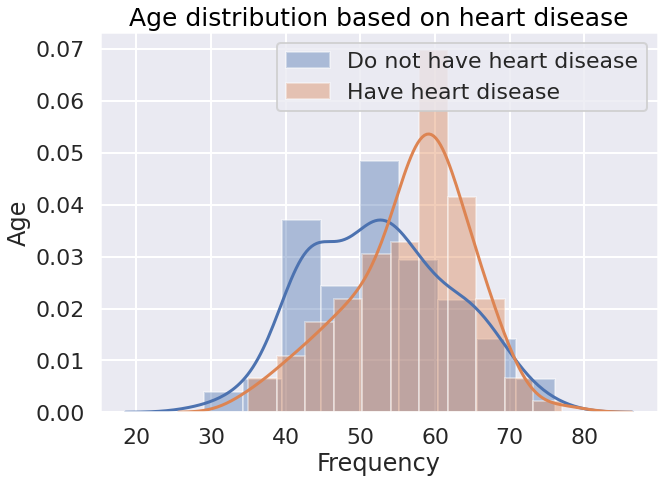

In [ ]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(heart[heart['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(heart[heart['target'] == 2]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.legend()
plt.show()

**Gender**

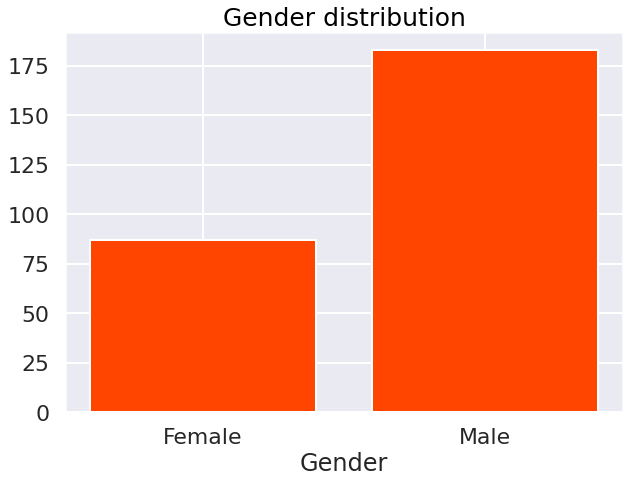

In [ ]:
sns.set_theme(context='poster')
# Number of males and females
F = heart[heart['sex'] == 0].count()['target']
M = heart[heart['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (10, 7))
ax.bar(x = ['Female', 'Male'], height = [F, M],color='orangered')
plt.xlabel('Gender')
plt.title('Gender distribution', color="Black",fontsize=25)
plt.show()

**Other variables**
<br>
Chest pain
<br>
Blood pressure
<br>
Cholesterol
<br>
Fasting blood sugar
<br>
Electrocardiographic results
<br>
Maximum heart rate
<br>
Exercise induced angina
<br>
ST depression
<br>
Slope
<br>
Major vessels
<br>
Thalassemia

In [ ]:
heart['cp'].value_counts()

4    129
3     79
2     42
1     20
Name: cp, dtype: int64

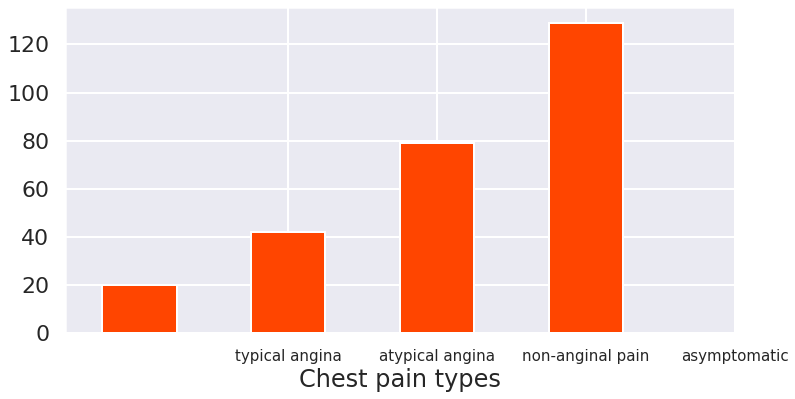

In [ ]:
# Chest pain types in bar chart
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
xs =[1,2,3,4]
labels = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']

heart.groupby(heart['cp']).count()['target'].plot(kind = 'bar', figsize = (12, 6),color='orangered')
plt.xlabel('Chest pain types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt. xticks(xs,labels)
plt.show()

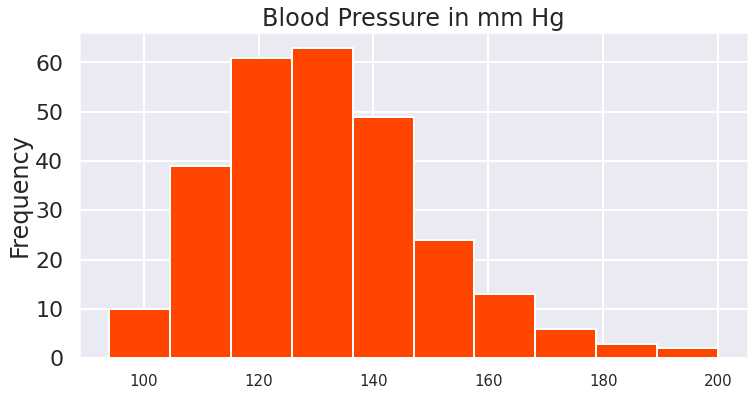

In [ ]:
# Blood pressure distribution
heart['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (12, 6), color='orangered')
plt.show()

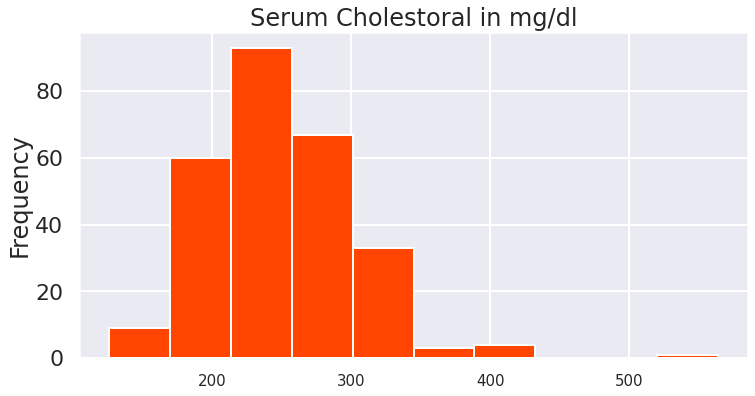

In [ ]:
# Display cholestoral distribution
heart['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (12, 6), color='orangered')
plt.show()

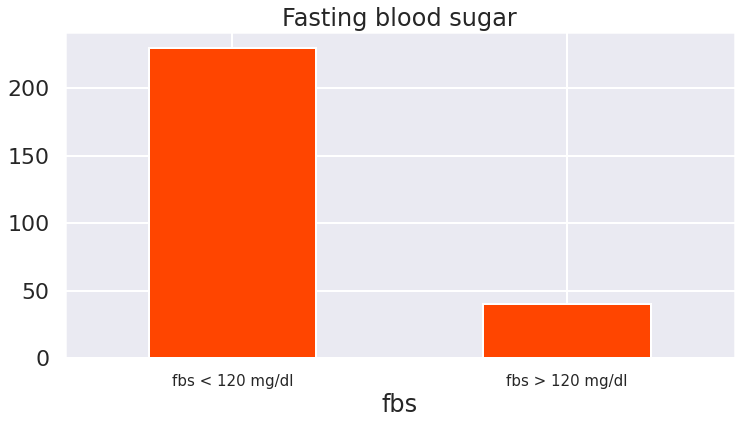

In [ ]:
# Display fasting blood sugar in bar chart
heart.groupby(heart['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting blood sugar', figsize = (12, 6), color='orangered')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

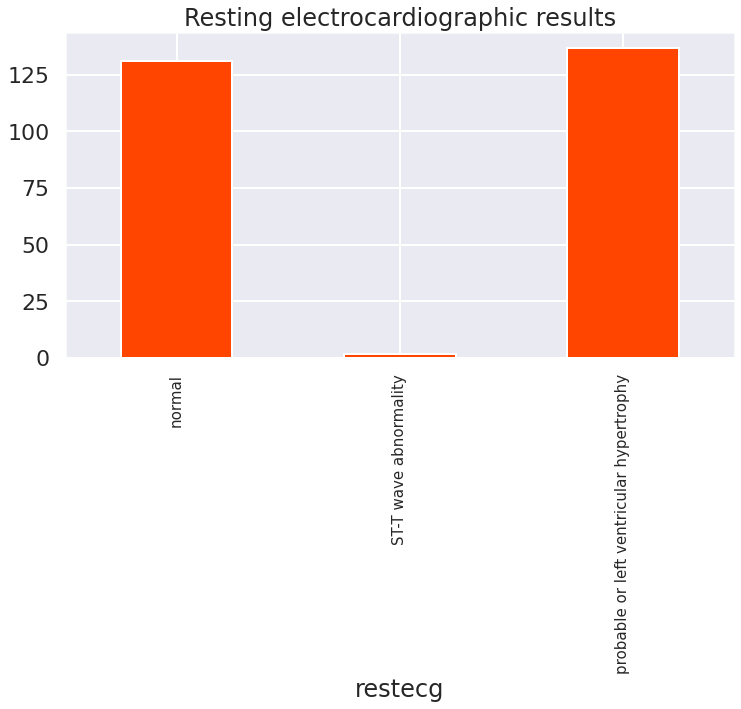

In [ ]:
# Display electrocardiographic results in bar chart
heart.groupby(heart['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting electrocardiographic results', figsize = (12, 6), color='orangered')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

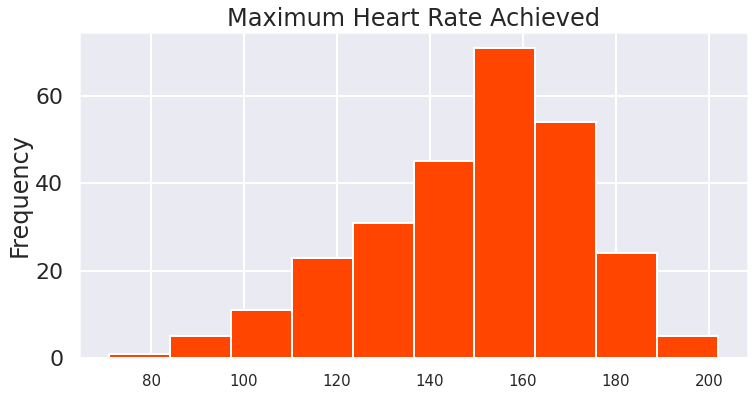

In [ ]:
# Display maximum heart rate distribution
heart['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (12, 6), color='orangered')
plt.show()

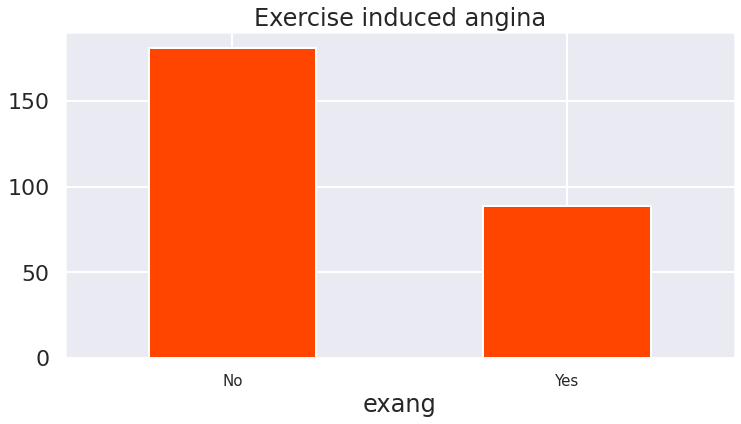

In [ ]:
# Display exercise induced angina in bar chart
heart.groupby(heart['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise induced angina',  figsize = (12, 6), color='orangered')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

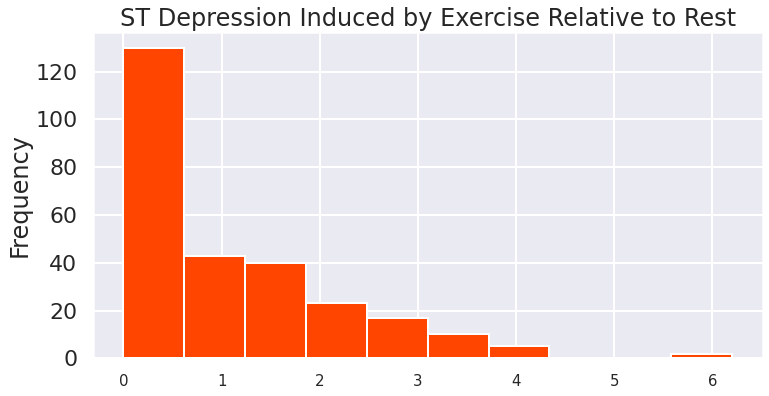

In [ ]:
# Display ST depression induced by exercise relative to rest distribution
heart['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (12, 6), color='orangered')
plt.show()

In [ ]:
heart['slope'].value_counts()

1    130
2    122
3     18
Name: slope, dtype: int64

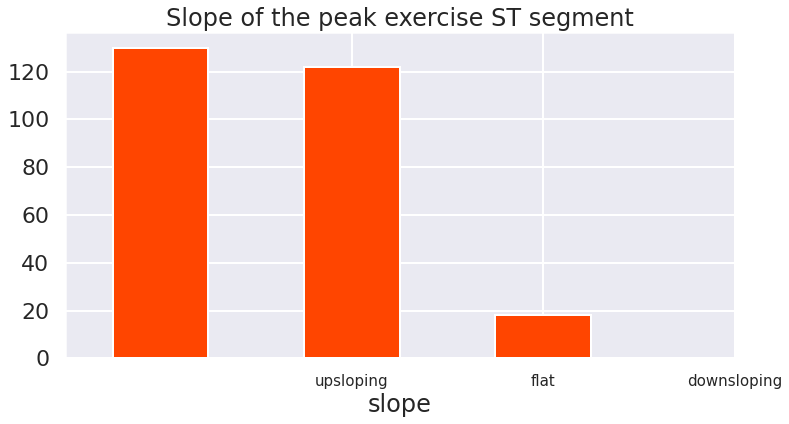

In [ ]:
# Display slope of the peak exercise ST segment in bar chart
matplotlib.rc('xtick', labelsize=15) 
xs =[1,2,3]
labels = ['upsloping', 'flat', 'downsloping']

heart.groupby(heart['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the peak exercise ST segment', figsize = (12, 6), color='orangered')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt. xticks(xs,labels)
plt.show()

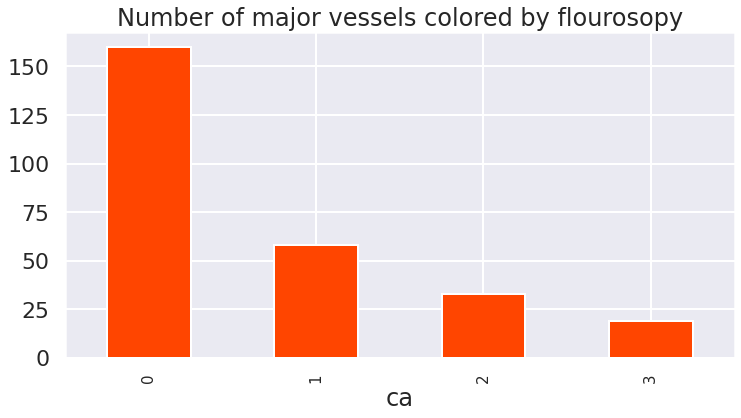

In [ ]:
# Display number of major vessels in bar chart
heart.groupby(heart['ca']).count()['target'].plot(kind = 'bar', title = 'Number of major vessels colored by flourosopy', figsize = (12, 6), color='orangered')
plt.show()

In [ ]:
heart['thal'].value_counts()

3    152
7    104
6     14
Name: thal, dtype: int64

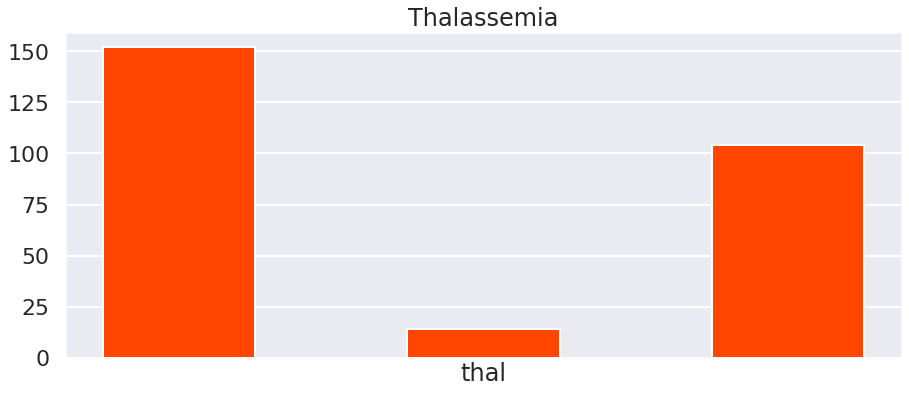

In [ ]:
# Display thalassemia in bar chart
matplotlib.rc('xtick', labelsize=12) 
xs =[3,7,6]
labels = ['normal', 'fixed defect', 'reversible defect']

heart.groupby(heart['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia', figsize=(15,6), color='orangered')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.xticks(xs,labels)
plt.autoscale(enable=True)
plt.show()

**Correlations**
* Age and heart rate
* Age and CA
* Target, slope and oldpeak

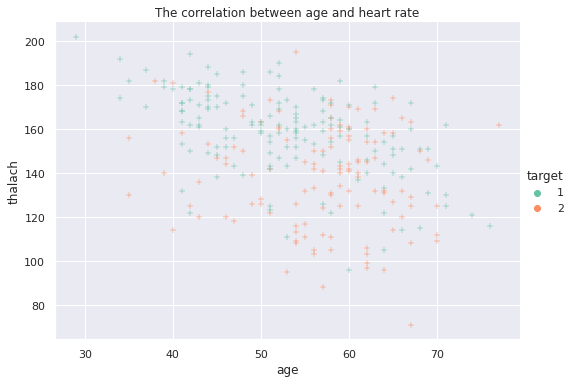

In [ ]:
# Age and heart rate
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

sns.relplot(x = 'age', y = 'thalach', data = heart, hue = 'target', legend="full", palette="Set2",marker="+",color="g",height=5.27, aspect=11.7/8.27)
plt.title('The correlation between age and heart rate')
plt.show()

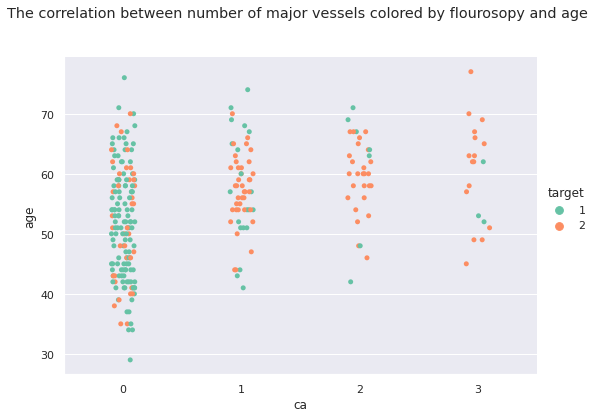

In [ ]:
# Age and CA
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = heart, palette="Set2",height=5.27, aspect=11.7/8.27)
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



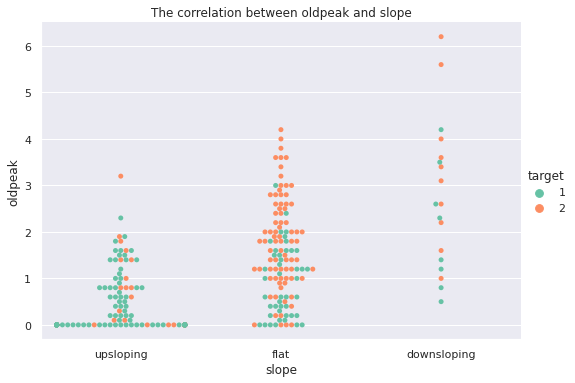

In [ ]:
# Target, slope and oldpeak
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = heart, height=5.27, palette="Set2",kind="swarm",aspect=11.7/8.27)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

**Modeling** <br>
For the model development part, I will use the following models: i) support vector macine, ii) random forest, iii) Ada Boost, iv) Gradient boosting for evaluating cardiovacular risk prediction using set of predictor variables defined/examined above.

> Steps to go:
> 1. Prepare data for ML 
> 2. Train and evaludate model
> 3. Examine the important features of the model
> 4. Save the model

In [ ]:
# 1.1 Initialize data and target
target = heart['target']
features = heart.drop(['target'], axis = 1)

In [ ]:
# 1.2 Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [ ]:
# 2.1 Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [ ]:
# 2.2 Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [ ]:
# 2.3 Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           1       0.71      0.90      0.79        30
           2       0.81      0.54      0.65        24

    accuracy                           0.74        54
   macro avg       0.76      0.72      0.72        54
weighted avg       0.76      0.74      0.73        54


confusion_matrix :
[[27  3]
 [11 13]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54


confusion_matrix :
[[22  8]
 [ 7 17]]

-----

AdaBoostClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        30
           2       0.7

In [ ]:
# 3.1 Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

> Based on the results presented above,I am happy to pick gradient boosting classifier for further development.

Feature: age, Score: 0.06003
Feature: sex, Score: 0.01170
Feature: cp, Score: 0.28587
Feature: trestbps, Score: 0.03719
Feature: chol, Score: 0.06027
Feature: fbs, Score: 0.00082
Feature: restecg, Score: 0.00376
Feature: thalach, Score: 0.06526
Feature: exang, Score: 0.02465
Feature: oldpeak, Score: 0.13452
Feature: slope, Score: 0.04946
Feature: ca, Score: 0.17047
Feature: thal, Score: 0.09600


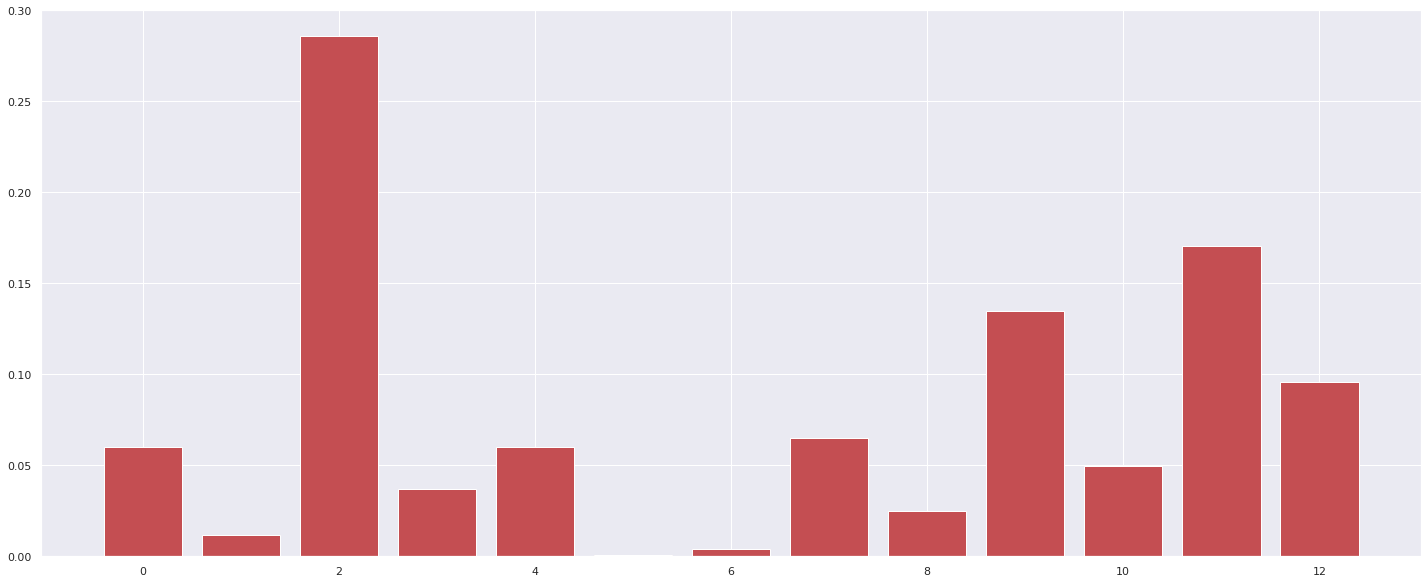

In [ ]:
# 3.2 Get the important features 
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, color='r')
plt.tight_layout()
plt.show()

In [ ]:
# 4. Save the model as serialized object pickle
with open('model_heart.pkl', 'wb') as file:
    pickle.dump(gb, file)